In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('agriculture.csv')

# OVERVIEW

In agriculture, India is a land of contradictions. The country produces 11 percent1 of total global agriculture and, at the same time, is host to the world’s largest number of malnourished people.2 Agriculture provides livelihoods for about half of the Indian population, most of whom are smallholder farmers, yet a majority of government agricultural subsidies are used by medium- and large-scale farmers.3 Parallel to India’s tremendous successes in the modernization of agriculture, smallholder farmers have been marginalized. The average debt of a farming household has risen fivefold in a decade, while increases in farm incomes have not kept up, and more than 300,000 Indian farmers have committed suicide since 1995.

Source- McKinsey Articles

# OBJECTIVE

The objective is to bring technological advancement in the field of agriculture also which I feel is not up to the mark. We wuold be doing this by
1- Analysing the data
2- Understanding the trend which will eventually help us in predictive analysis
3- Understnading all these (if read properly) should evenetually help in moving from production centric to market centric infrastructure.

# UNDERSTANDIND DATA

**UNDERSTANDING THE DATA AND CLEANING!**

In [4]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [5]:
#Data description
df.describe()

,Area,Production,Yield
count,3.453740e+05,3.404140e+05,345374.000000
mean,1.167019e+04,9.583711e+05,79.407569
std,4.583843e+04,2.152986e+07,916.628744
min,4.000000e-03,0.000000e+00,0.000000
25%,7.400000e+01,8.700000e+01,0.546742
50%,5.320000e+02,7.170000e+02,1.000000
75%,4.110000e+03,7.176000e+03,2.467080
max,8.580100e+06,1.597800e+09,43958.333330


Lets try to find uniqueness in the rows of this dataset.

In [6]:
df.groupby(['State', 'District', 'Crop', 'Year']).size()

State                        District                     Crop       Year   
Andaman and Nicobar Islands  Andaman and Nicobar Islands  Arecanut   2007-08    2
                                                                     2008-09    2
                                                                     2009-10    2
                                                          Arhar/Tur  2007-08    1
                                                                     2008-09    1
                                                                               ..
West Bengal                  PURULIA                      Wheat      2015-16    1
                                                                     2016-17    1
                                                                     2017-18    1
                                                                     2018-19    1
                                                                     2019-20    1
Length: 297482, dtype

There seems too many rows for a single type of crop. We may have to go deep to find why is so...!!!

In [7]:
g = df[df['District'] == "Andaman and Nicobar Islands"][df['Year'] == "2007-08"][df['Crop'] == "Arecanut"]
g

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9692\1731573671.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = df[df['District'] == "Andaman and Nicobar Islands"][df['Year'] == "2007-08"][df['Crop'] == "Arecanut"]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9692\1731573671.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = df[df['District'] == "Andaman and Nicobar Islands"][df['Year'] == "2007-08"][df['Crop'] == "Arecanut"]


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
85043,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Arecanut,2007-08,Kharif,2439.6,Hectare,3415.44,Tonnes,1.4
85044,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Arecanut,2007-08,Rabi,1626.4,Hectare,2276.96,Tonnes,1.4


In [8]:
    duplicate = df[df.duplicated()]
    
    duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             0 non-null      object 
 1   District          0 non-null      object 
 2   Crop              0 non-null      object 
 3   Year              0 non-null      object 
 4   Season            0 non-null      object 
 5   Area              0 non-null      float64
 6   Area Units        0 non-null      object 
 7   Production        0 non-null      float64
 8   Production Units  0 non-null      object 
 9   Yield             0 non-null      float64
dtypes: float64(3), object(7)
memory usage: 0.0+ bytes


This is Big revelation after coding this dataframe. Every row in this data is duplicated. Seems a single data has been concatenated twice. Removing the duplicated data so that proper working can be carried out now. 

In [9]:
#Dropping duplicate columns.
dfa = df.drop_duplicates()

dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [10]:
dfa.groupby(['District', 'Crop', 'Year', 'Season']).size()

District            Crop            Year     Season    
24 PARAGANAS NORTH  Arecanut        1997-98  Whole Year    1
                                    1998-99  Whole Year    1
                                    1999-00  Whole Year    1
                                    2000-01  Whole Year    1
                                    2001-02  Whole Year    1
                                                          ..
ZUNHEBOTO           other oilseeds  2015-16  Kharif        1
                                    2016-17  Kharif        1
                                    2017-18  Kharif        1
                                    2018-19  Kharif        1
                                    2019-20  Kharif        1
Length: 344012, dtype: int64

Hence, The combination of columns [District, Crop, Year and Season] gives us a primary key.


**Classification of data in categorical and continuous types**

In [11]:
catg = dfa.select_dtypes("object")
cont = dfa.select_dtypes("float")
catg.head()

,State,District,Crop,Year,Season,Area Units,Production Units
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,Hectare,Tonnes
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,Hectare,Tonnes
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,Hectare,Tonnes
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,Hectare,Tonnes
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,Hectare,Tonnes


In [12]:
cont.head()

,Area,Production,Yield
0,1254.0,2061.0,1.643541
1,1258.0,2083.0,1.655803
2,1261.0,1525.0,1.209358
3,3100.0,5239.0,1.690000
4,3105.0,5267.0,1.696296


In [13]:
catg.describe()

,State,District,Crop,Year,Season,Area Units,Production Units
count,345407,345407,345375,345407,345406,345407,345407
unique,36,729,56,24,6,1,3
top,Uttar Pradesh,BILASPUR,Rice,2019-20,Kharif,Hectare,Tonnes
freq,44781,1244,21611,19296,138400,345407,331686


In [14]:
#Rounding off 'Yield' column to 3 places

dfa["Yield"] = dfa["Yield"].round(2)

dfa.head()


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.64
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.66
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.21
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.69
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.70


# LET'S TRY ANSWERING FEW QUESTIONS NOW!

Though I am answering few questions here, one can find answers of similar questions by editing data in the code. Also, if you want few other questions to be answered from this data set, feel free to drop them in the comments section. I will try to answer them in my full capacity.

**Q1- Find the number of rows of entries for each state in the dataset?**

In [15]:
dfa["State"].value_counts()

State
Uttar Pradesh                  44781
Madhya Pradesh                 29906
Karnataka                      27493
Bihar                          24697
Rajasthan                      20363
Tamil Nadu                     18525
Assam                          18186
Maharashtra                    17922
Andhra Pradesh                 16363
Odisha                         16153
Chhattisgarh                   15285
Gujarat                        14053
West Bengal                    12596
Haryana                         8305
Uttarakhand                     6702
Nagaland                        5676
Himachal Pradesh                5043
Jharkhand                       5004
Kerala                          4870
Telangana                       4704
Jammu and Kashmir               4348
Arunachal Pradesh               4345
Meghalaya                       4322
Punjab                          4142
Manipur                         3120
Tripura                         2557
Mizoram                         

**Q2- For the given year 2019-20, visualise the trend between 'State' and 'Total Yield' for crop 'Rice"?**

For this, I have tried finding out the actual yield first. In this dataset, I have found that there are multiple rows of rice production for a given state. Therefore, I summed up the total production and total area for every state where rice has been produced and then applied the formula with these values to find the actual yield.

Actual Yield of rice = (Total production of rice in the state) / (Total area)

In [16]:
dfa2020 = dfa[dfa['Year'] == "2019-20"][dfa['Crop'] == "Rice"]

dfa2020 = dfa2020 [['State', 'Area', 'Production' ]]
g = dfa2020.groupby('State').sum().reset_index()
g['Actual Yield'] = g['Production'] / g['Area']
g

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9692\2417896458.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfa2020 = dfa[dfa['Year'] == "2019-20"][dfa['Crop'] == "Rice"]


,State,Area,Production,Actual Yield
0,Andaman and Nicobar Islands,5701.12,17981.25,3.153986
1,Andhra Pradesh,2355982.00,9140091.00,3.879525
2,Arunachal Pradesh,133500.00,244741.00,1.833266
3,Assam,2400949.00,5214804.00,2.171976
4,Bihar,3097390.00,6952518.00,2.244638
5,Chandigarh,80.00,440.00,5.500000
6,Chhattisgarh,4266022.00,8569367.00,2.008749
7,Delhi,5848.00,17580.00,3.006156
8,Goa,34698.00,90375.00,2.604617
9,Gujarat,904350.00,1982633.00,2.192329


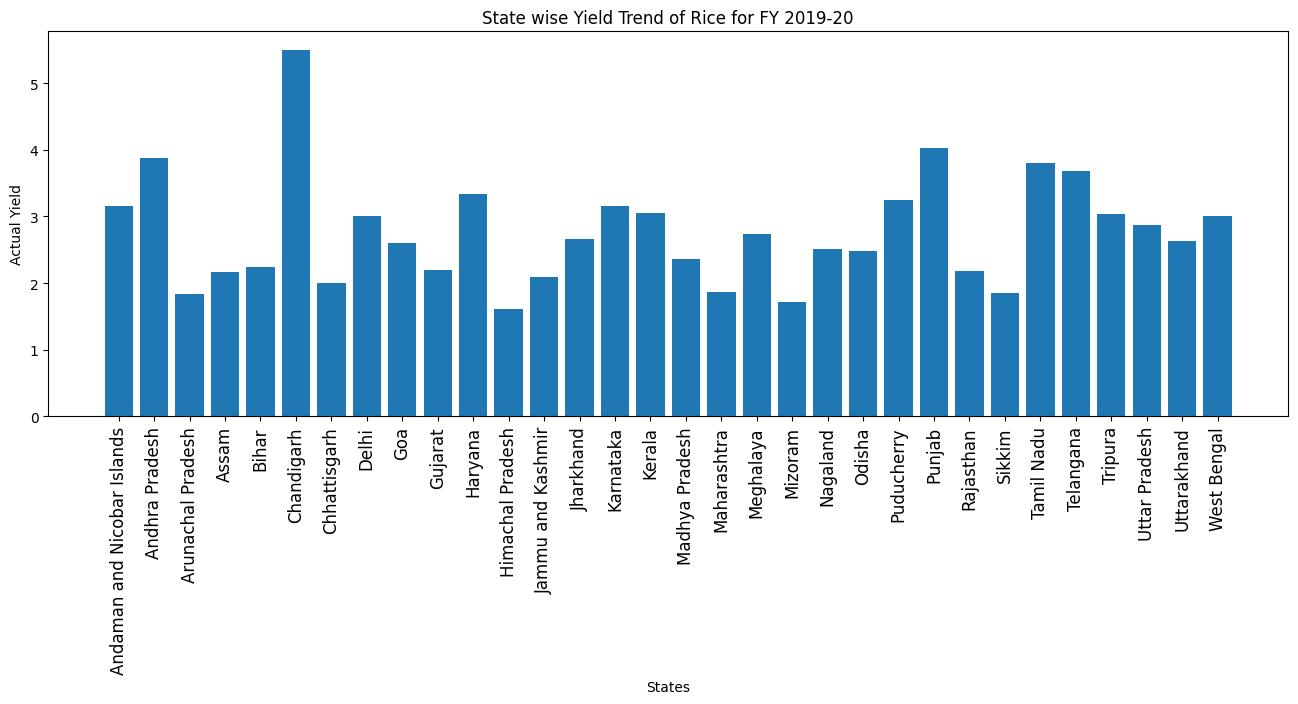

In [17]:
plt.figure(figsize = (16, 5))
plt.bar(g['State'], g['Actual Yield'])
plt.xticks(g['State'], rotation = 'vertical', size=12)
plt.xlabel('States')
plt.ylabel('Actual Yield')
plt.title('State wise Yield Trend of Rice for FY 2019-20')
plt.show()

**Q3- Name the top 5 states with maximum rice yield in year 2019-20?**

In [18]:
g.nlargest(5, 'Actual Yield')

,State,Area,Production,Actual Yield
5,Chandigarh,80.0,440.0,5.500000
23,Punjab,3142000.0,12675000.0,4.034055
1,Andhra Pradesh,2355982.0,9140091.0,3.879525
26,Tamil Nadu,1907407.0,7265161.0,3.808920
27,Telangana,3234445.0,11923901.0,3.686537


States with Maximum Yield- Chandigarh, Punjab, Andhra Pradesh, Tamil Nadu, Telangana

**Q4- Name the top 5 states with maximum rice production in year 2019-20?**

In [19]:
g.nlargest(5, 'Production')

,State,Area,Production,Actual Yield
29,Uttar Pradesh,5924349.0,17027889.0,2.874221
31,West Bengal,5490975.0,16476021.0,3.000564
23,Punjab,3142000.0,12675000.0,4.034055
27,Telangana,3234445.0,11923901.0,3.686537
21,Odisha,3940710.0,9755050.0,2.475455


States with Maximum Rice Production- West Bengal, Punjab, Telangana, Andhra Pradesh, Madhya Pradesh.

**Q5- Which state has had the best yield for each of the crops in year 2019-20?**

In [20]:
df2020 = dfa[dfa['Year'] == '2019-20']

temp = df2020 [['Crop', 'State', 'Area', 'Production']]
best_state = temp.groupby(['Crop','State']).sum().reset_index()
best_state['Actual Yield'] = best_state['Production'] / best_state['Area']

best_state['max yield'] = best_state.groupby(['Crop'])['Actual Yield'].transform(max) 
Best_States = best_state[best_state['Actual Yield'] == best_state['max yield']]
Best_States[['Crop', 'State', 'max yield']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9692\3242041965.py:7: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  best_state['max yield'] = best_state.groupby(['Crop'])['Actual Yield'].transform(max)


,Crop,State,max yield
4,Arecanut,Karnataka,10.807479
33,Arhar/Tur,West Bengal,2.635294
37,Bajra,Delhi,3.303729
60,Banana,Gujarat,74.615761
72,Barley,Haryana,3.851240
85,Black pepper,Assam,2.247507
93,Cardamom,Kerala,0.253823
98,Cashewnut,Karnataka,1.418258
108,Castor seed,Gujarat,1.944236
119,Coconut,Andhra Pradesh,18381.996982


**Q6- For given state Uttar Pradesh, find distribution of all crops
a- In AY 2001-02**

In [21]:
dfup = dfa[dfa['Year'] == '2001-02'][dfa['State'] == 'Uttar Pradesh']

dfup['Production Units'].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9692\3205383783.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfup = dfa[dfa['Year'] == '2001-02'][dfa['State'] == 'Uttar Pradesh']


array(['Tonnes', 'Bales'], dtype=object)

Since there are different units of measurement in UP state, we need to standardize the production for better comparison. 

As per https://www.convertunits.com/ we have 1 Ton = 4.5929637955182825 Bale which is a US standard of measurement. Let us convert all Bales to Tonnes. To do that we will divide all Bales with 4.59 to convert it into Tones

Nuts is a unit for Coconut and 1 Coconut = 1 Nut unit. As per this resource an average coconut weights 1.5 to 2 KG. Let us assume that one coconut weights 2 KG, we will have 50 coconuts in 1 Ton (100 KG). To convert Nuts to Tons we will divide Cocnut production units by 50 Note - This assumption may not be exactly correct, but we can take this as an assumption and go ahead with analysis, until we have an agriculture expert from Coconut farming to correct us :)

- Credits- Ashay Maheshwari

In [22]:
def unit_standardization(df):
   
    if df["Production Units"] == "Nuts":
        new_production = df["Production"] / 50 
        return new_production
        
    elif df["Production Units"] == "Tonnes":
        return df["Production"]
    
    else:
        new_production = df["Production"] / 4.59
        return new_production

dfup["New Production"] = dfup.apply(unit_standardization, axis = 1)
dfup.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,New Production
34291,Uttar Pradesh,AGRA,Arhar/Tur,2001-02,Kharif,4616.0,Hectare,7615.0,Tonnes,1.65,7615.0
34293,Uttar Pradesh,ALIGARH,Arhar/Tur,2001-02,Kharif,17338.0,Hectare,10731.0,Tonnes,0.62,10731.0
34295,Uttar Pradesh,ALLAHABAD,Arhar/Tur,2001-02,Kharif,11380.0,Hectare,23049.0,Tonnes,2.03,23049.0
34297,Uttar Pradesh,AMBEDKAR NAGAR,Arhar/Tur,2001-02,Kharif,3424.0,Hectare,3214.0,Tonnes,0.94,3214.0
34299,Uttar Pradesh,AMROHA,Arhar/Tur,2001-02,Kharif,845.0,Hectare,770.0,Tonnes,0.91,770.0


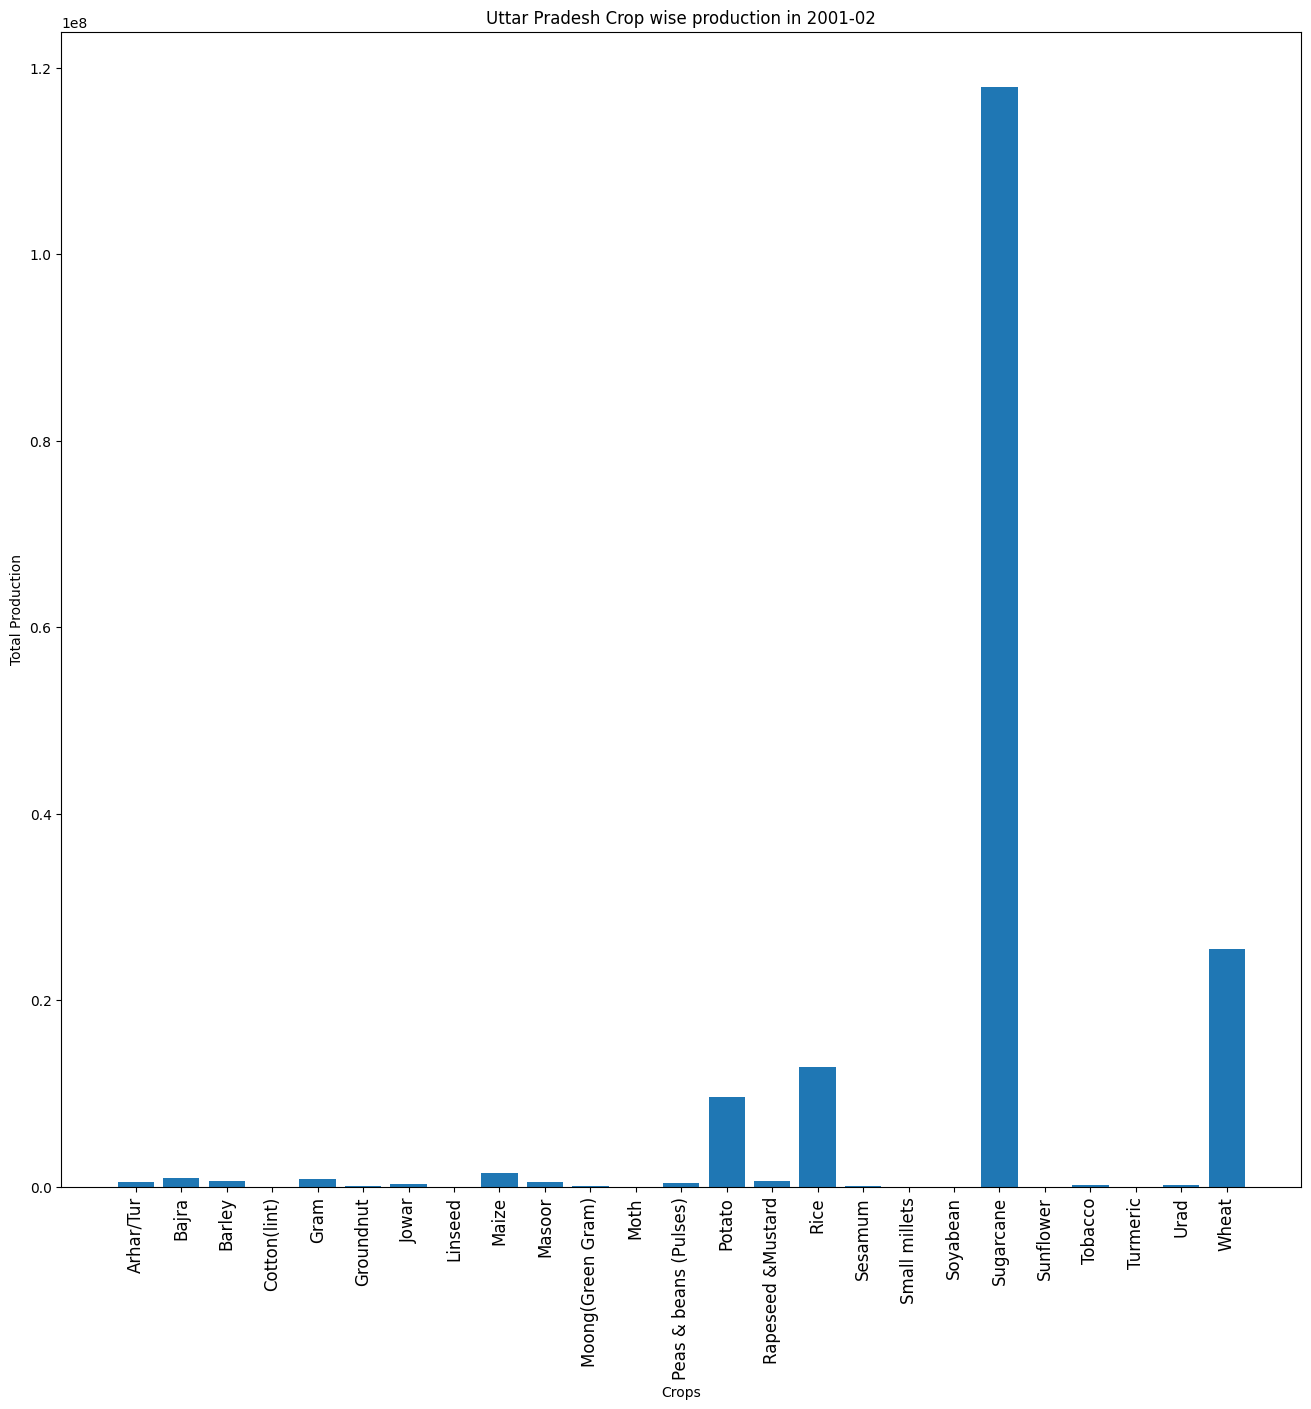

In [23]:
dfup1 = dfup.groupby('Crop').sum().reset_index()

dfup2 = dfup1[['Crop', 'New Production']]

plt.figure(figsize = (16, 15))
plt.bar(dfup2['Crop'], dfup2['New Production'])
plt.xticks(dfup2['Crop'], rotation = 'vertical', size=12)
plt.xlabel('Crops')
plt.ylabel('Total Production')
plt.title('Uttar Pradesh Crop wise production in 2001-02')
plt.show()

Because the bar of Sugarcane is so high, we are unable to study graph of other crops. Therefore, I am preparing one more graph where I will drop the Sugarcane bar just to study other crops. Rest all remains the same. One can study the graph above if they want sugarcane to be there.

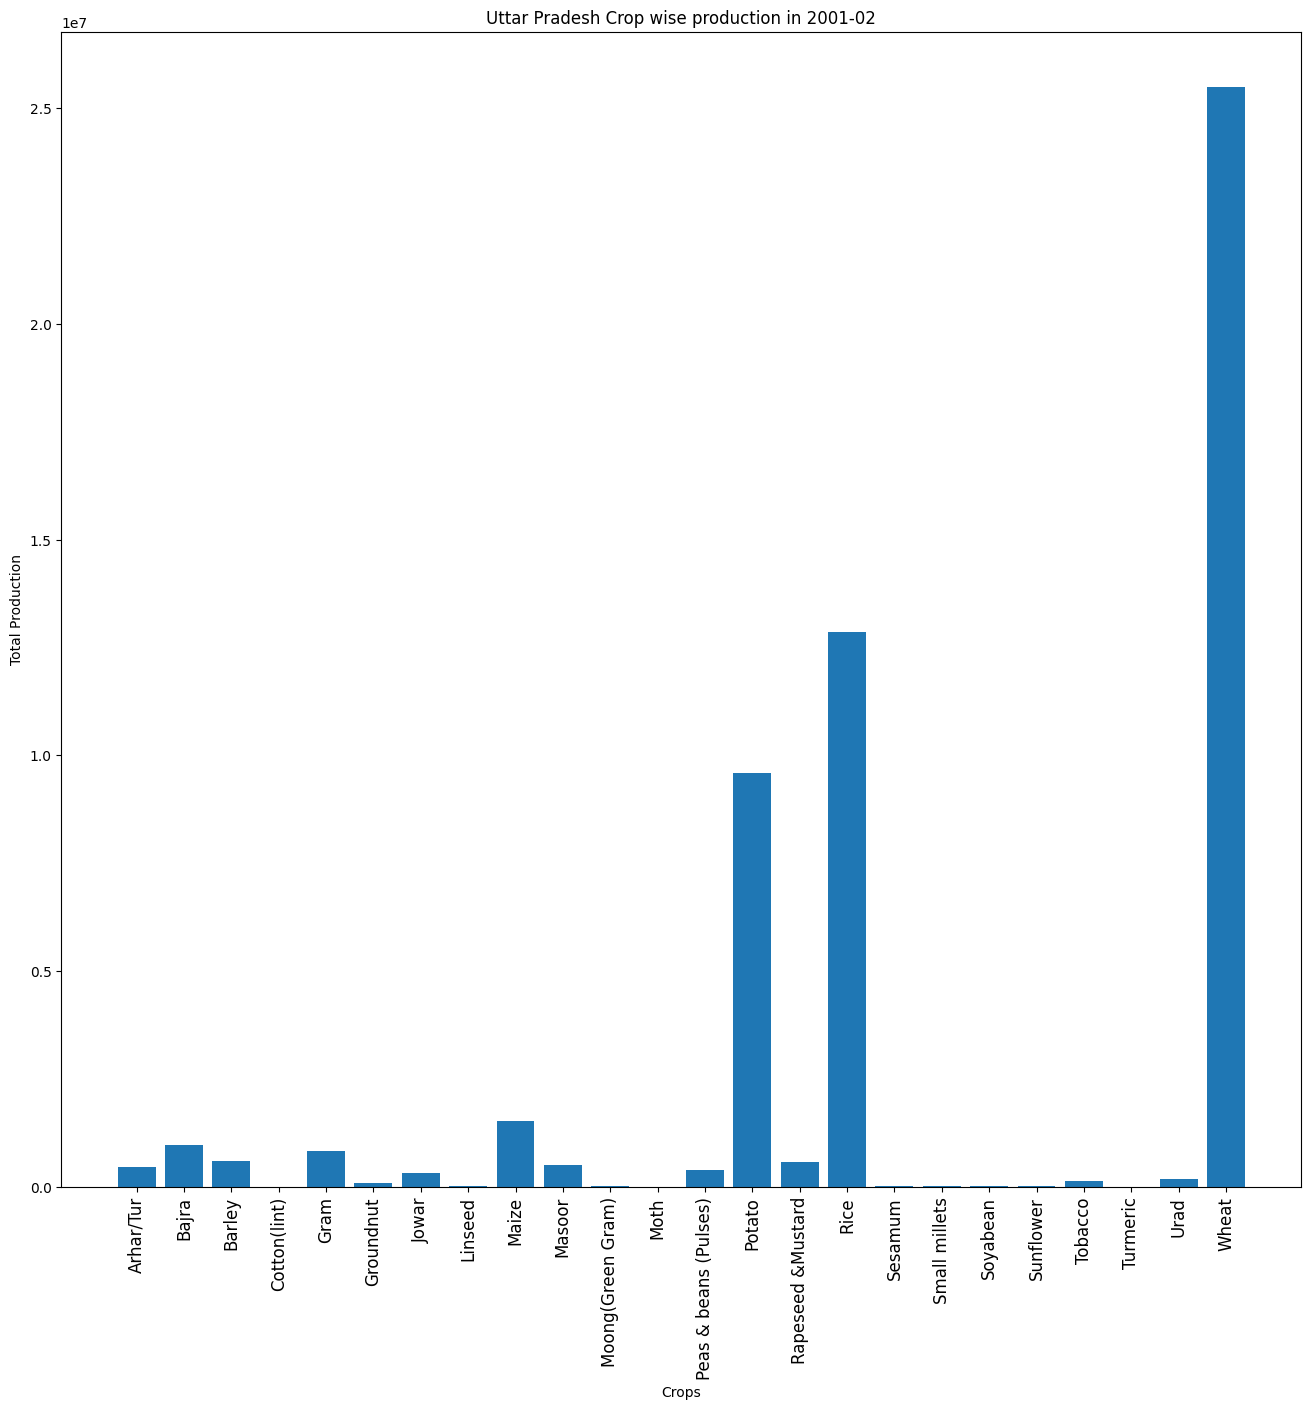

In [24]:
dfup3 = dfup2
dfup3 = dfup3.drop(labels = [19], axis=0)

plt.figure(figsize = (16, 15))
plt.bar(dfup3['Crop'], dfup3['New Production'])
plt.xticks(dfup3['Crop'], rotation = 'vertical', size=12)
plt.xlabel('Crops')
plt.ylabel('Total Production')
plt.title('Uttar Pradesh Crop wise production in 2001-02')
plt.show()

**Q7- For a given state, say Uttar Pradesh, find the number of records of different crop types.**

In [25]:
dfup10 = dfa[dfa['State'] == 'Uttar Pradesh']

n_records1 = dfup10.groupby('Crop')['State'].count().reset_index()
n_records1 ['no of records'] = n_records1['State']
n_records = n_records1.drop(columns = ['State'])
n_records

,Crop,no of records
0,Arhar/Tur,1445
1,Bajra,1492
2,Banana,530
3,Barley,1675
4,Castor seed,35
5,Coriander,884
6,Cotton(lint),297
7,Dry chillies,1088
8,Garlic,861
9,Ginger,129


**Q8- For a given year, say 2017-18, find the number of different types of crops?**

In [26]:
df18 = df[df["Year"] == "2017-18"]

df18_ncrops = df18.groupby(['Season']).nunique().reset_index()
df18_ncrops = df18_ncrops[['Season', 'Crop']]
df18_ncrops

,Season,Crop
0,Autumn,11
1,Kharif,49
2,Rabi,44
3,Summer,22
4,Whole Year,30
5,Winter,14


**Q9- For all the crops, list the states that have produced them?**

In [27]:
dfa.head()
z1 = dfa[['Crop', 'State']]
z = z1.drop_duplicates()

z['All States'] = z.groupby('Crop')['State'].transform(lambda x: ', '.join(x))
z = z[['Crop', 'All States']].drop_duplicates()

z.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9692\2101024558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['All States'] = z.groupby('Crop')['State'].transform(lambda x: ', '.join(x))


,Crop,All States
0,Arecanut,"Andaman and Nicobar Islands, Andhra Pradesh, A..."
6,Banana,"Andaman and Nicobar Islands, Andhra Pradesh, A..."
10,Black pepper,"Andaman and Nicobar Islands, Goa, Karnataka, K..."
14,Cashewnut,"Andaman and Nicobar Islands, Andhra Pradesh, G..."
20,Coconut,"Andaman and Nicobar Islands, Andhra Pradesh, A..."


**Q10- For Crop Rice, which state has most increase in yield over the years**

For this, we have to analyse the trend using line graph.

In [28]:
dfa_rice = dfa[dfa['Crop'] == 'Rice']
dfa_rice

i = dfa_rice.groupby(['State', 'Year']).sum().reset_index()
i['Actual Yield'] = i['Production'] / i['Area']
i = i.drop(columns = ['Yield'])
i.head(20)

i1 = i[['State', 'Year', 'Actual Yield']]

gaur1 = i1.sort_values(by=['Year', 'State'])
gaur1.head()

,State,Year,Actual Yield
20,Andhra Pradesh,1997-98,2.431290
43,Arunachal Pradesh,1997-98,1.079028
66,Assam,1997-98,0.892929
89,Bihar,1997-98,1.395318
218,Goa,1997-98,2.775688


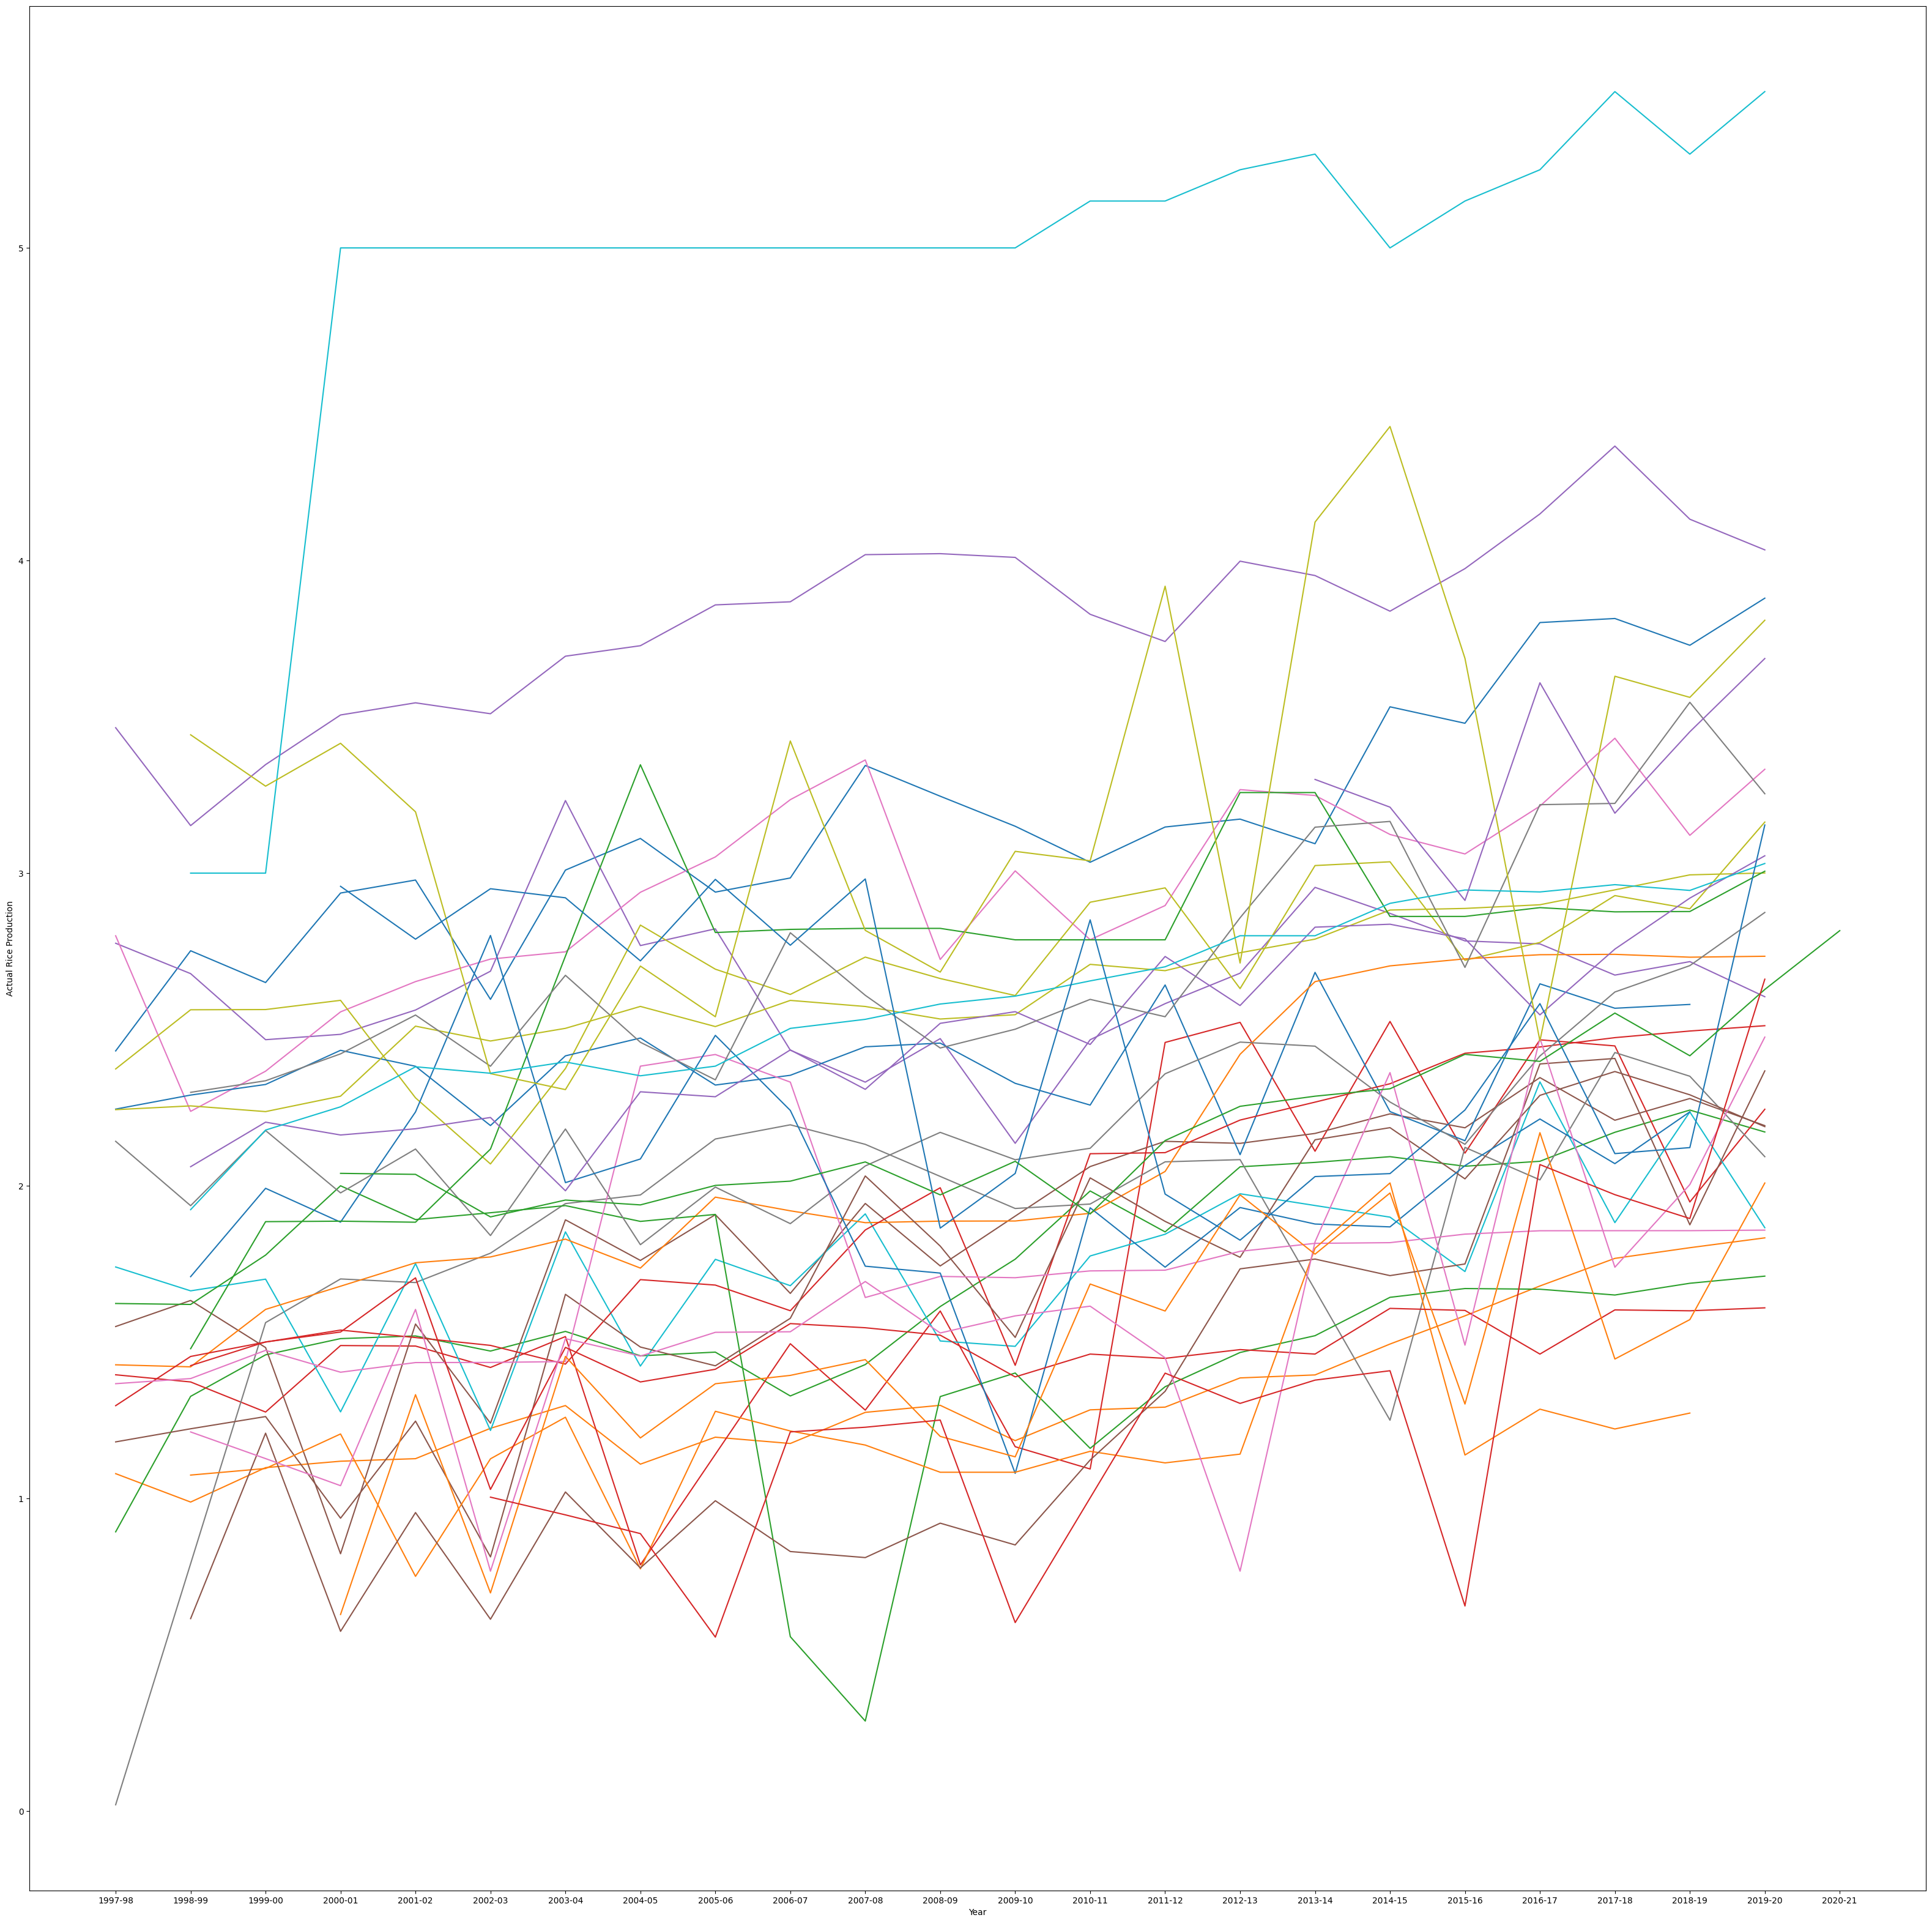

In [29]:
plt.figure(figsize = (40, 40))
for state in gaur1['State'].unique():
    plt.plot(gaur1[gaur1['State'] == state]['Year'], gaur1[gaur1['State'] == state]['Actual Yield'], label='line ' +state)

plt.xlabel('Year')
plt.ylabel('Actual Rice Production')
plt.show()

In [30]:
temp = dfup2
temp = temp.drop(labels = [19], axis=0)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 24
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            24 non-null     object 
 1   New Production  24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes
